In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pycaret


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *

In [4]:
# Load dataset
df = pd.read_csv(r"C:\Users\Gabriel\Downloads\it3385_assignment\03_Wheat_Seeds.csv")

# Display basic info
print("Dataset Overview:")
display(df.head())
display(df.info())
display(df.describe())

Dataset Overview:


,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            199 non-null    float64
 1   Perimeter       199 non-null    float64
 2   Compactness     199 non-null    float64
 3   Length          199 non-null    float64
 4   Width           199 non-null    float64
 5   AsymmetryCoeff  199 non-null    float64
 6   Groove          199 non-null    float64
 7   Type            199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


None

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [5]:
# Check for missing values
print("Missing Values:")
display(df.isnull().sum())


Missing Values:


Area              0
Perimeter         0
Compactness       0
Length            0
Width             0
AsymmetryCoeff    0
Groove            0
Type              0
dtype: int64

In [6]:
# Check class distribution
print("Class Distribution:")
display(df['Type'].value_counts())


Class Distribution:


Type
2    68
1    66
3    65
Name: count, dtype: int64

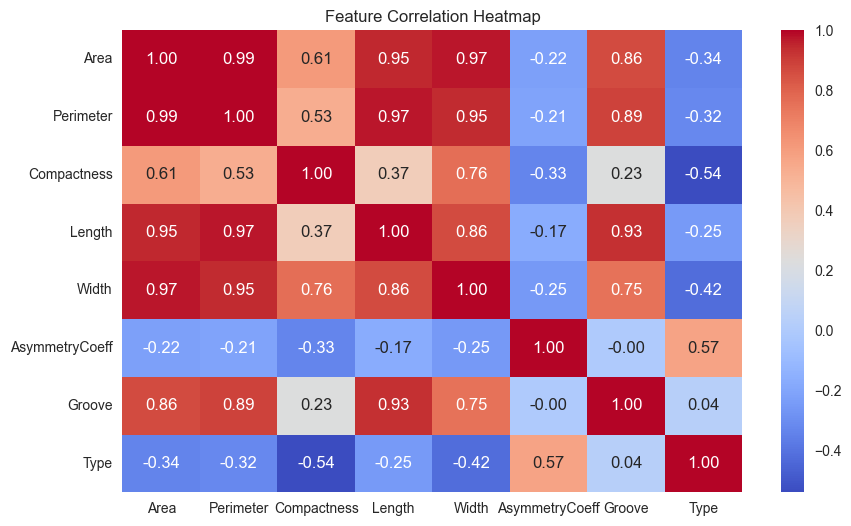

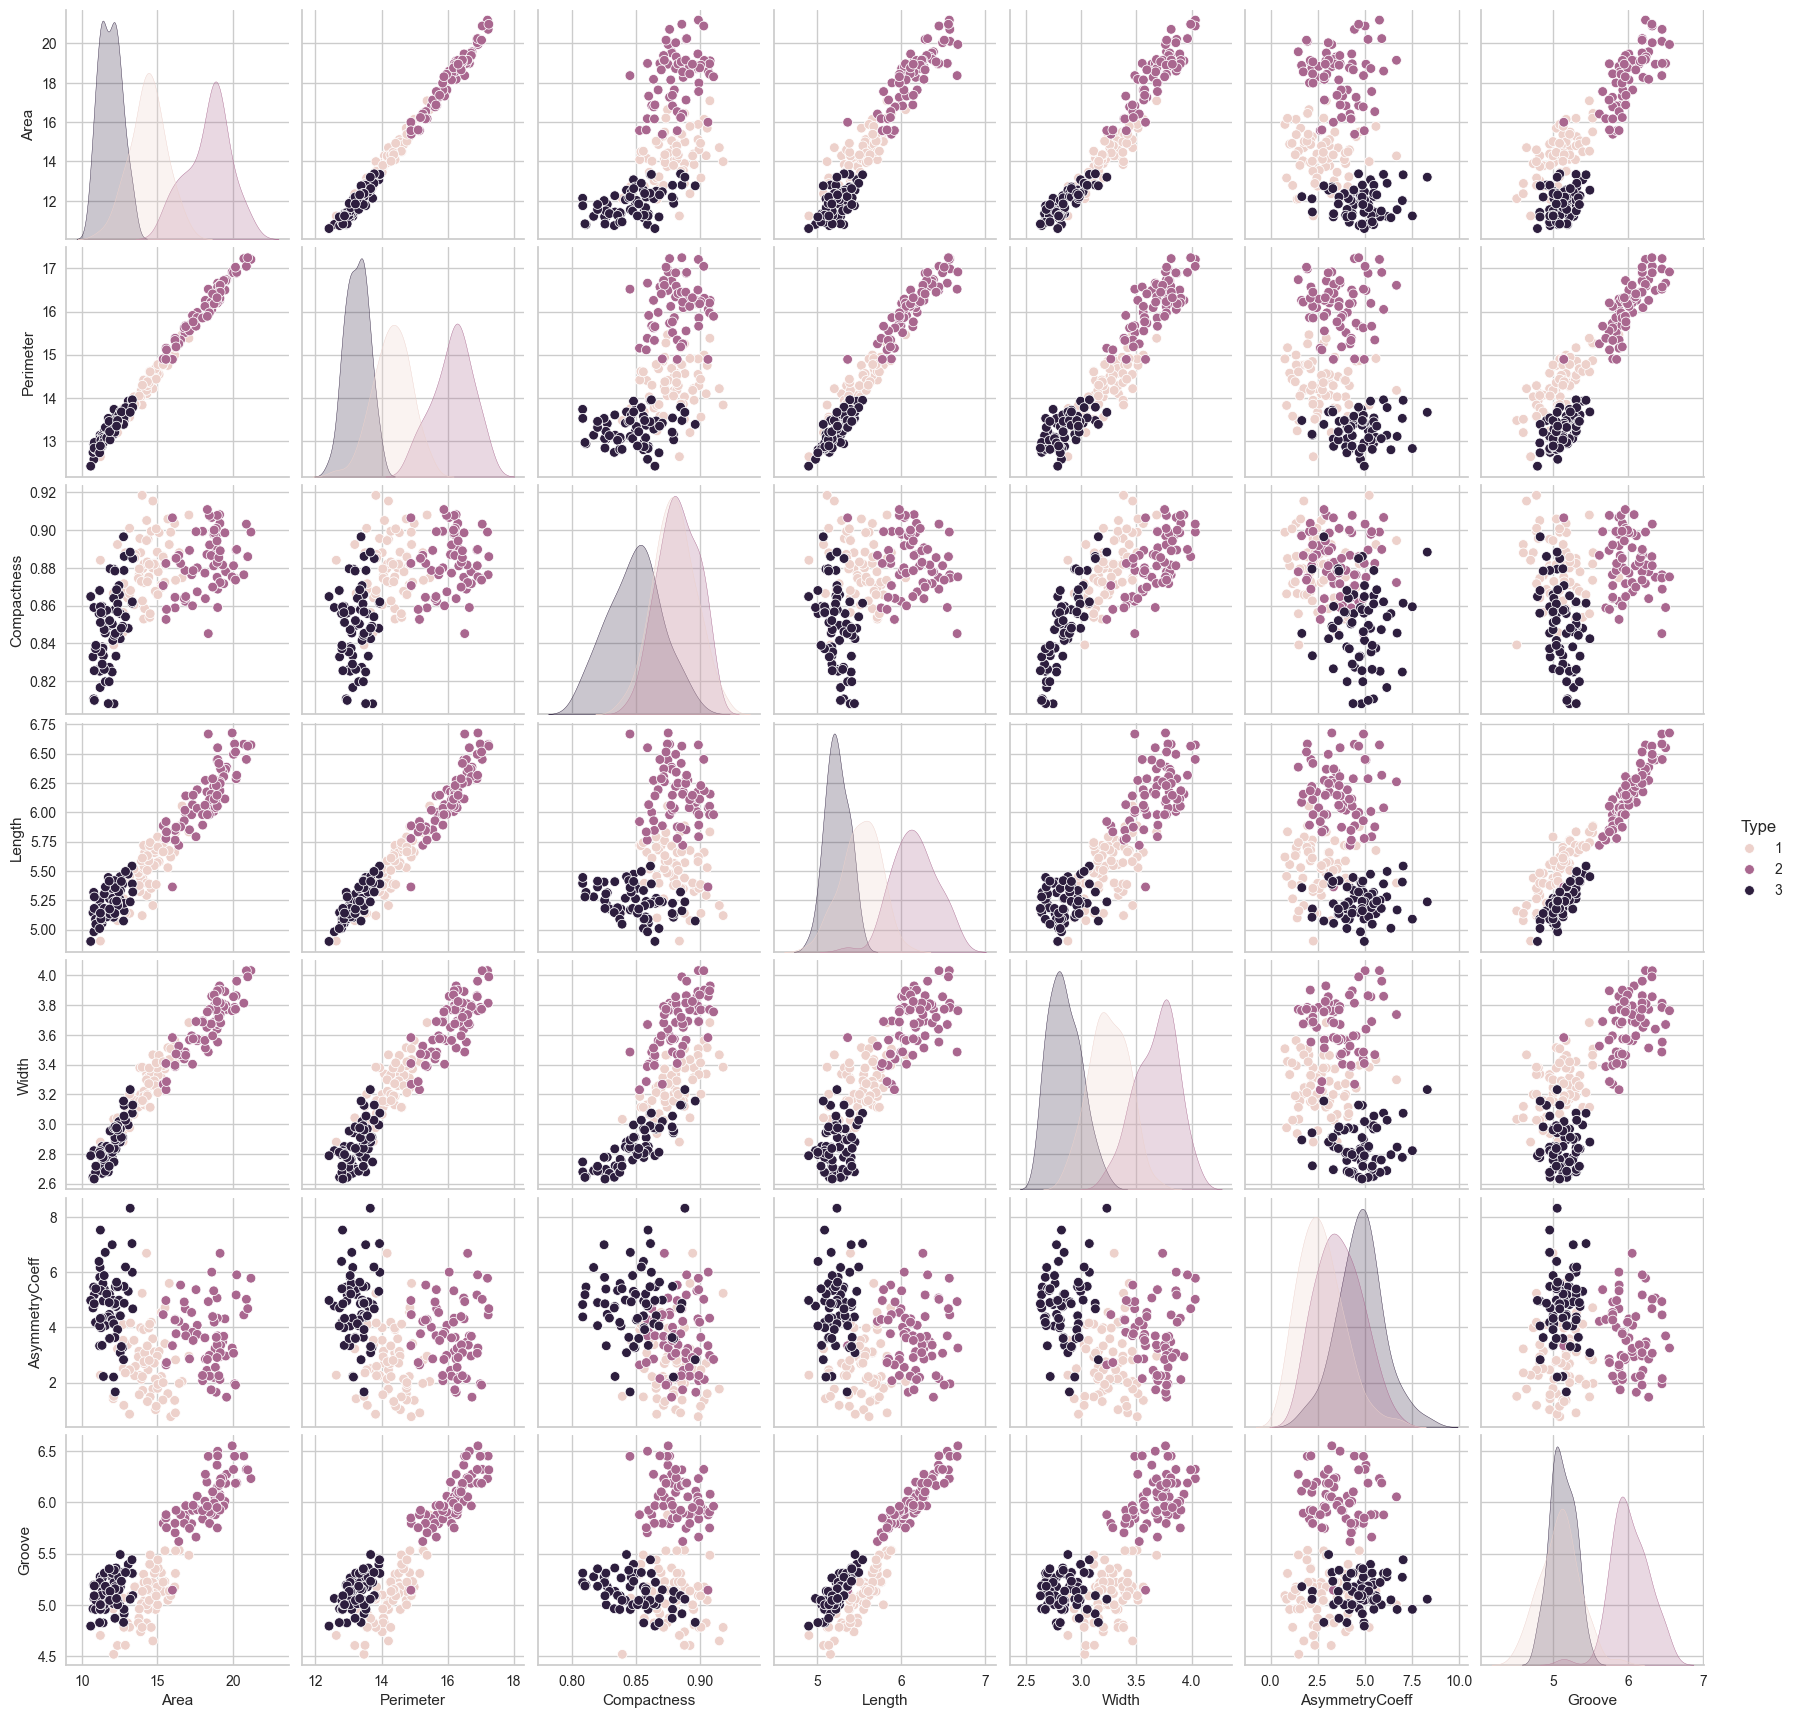

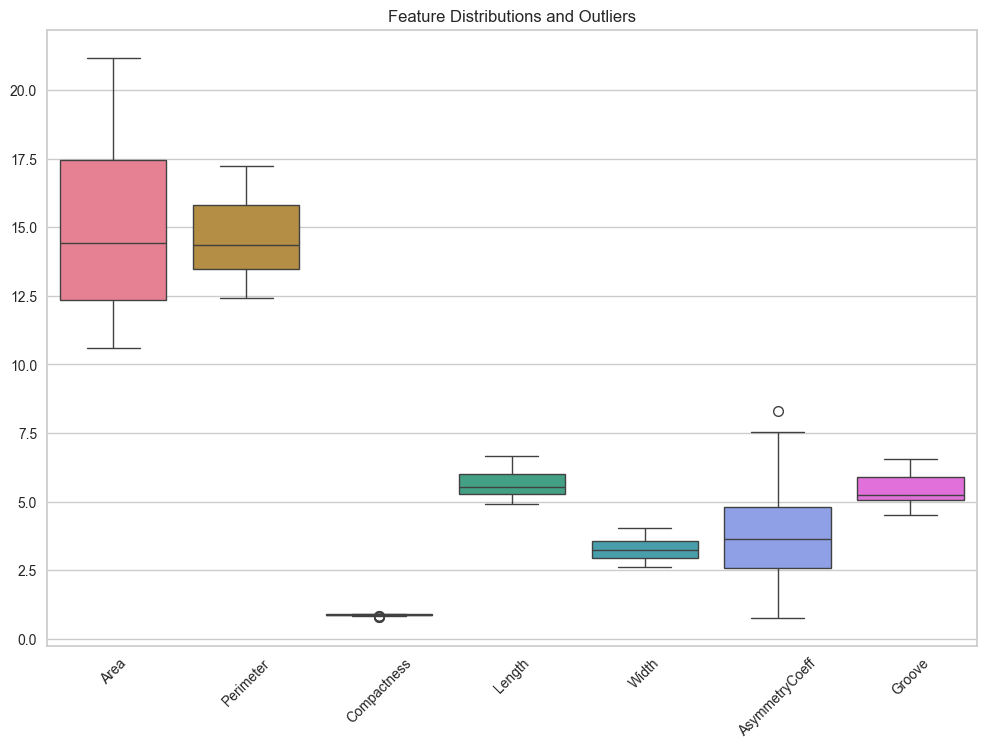

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df, hue='Type', diag_kind='kde')
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['Type']))
plt.xticks(rotation=45)
plt.title("Feature Distributions and Outliers")
plt.show()

In [8]:
# Normalize and scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

## Task 2: PyCaret ML Pipeline

In [9]:
pip install mlflow


Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.model_selection import train_test_split  # Add this import

# Split the data into training and test sets (80% training, 20% testing)
X = df.drop(columns='Type')  # Features
y = df['Type']  # Target variable

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Combine X_train and y_train into a single dataframe for PyCaret
train_data = X_train.copy()
train_data['Type'] = y_train

# Combine X_test and y_test into a single dataframe for PyCaret (for later evaluation)
test_data = X_test.copy()
test_data['Type'] = y_test

In [20]:
clf = setup(data=df, target='Type', session_id=42,
            normalize=True, 
            transformation=True,
            feature_selection=True,
            fix_imbalance=True,
            log_experiment=False,  # Disable logging
            experiment_name="wheat_classification")


,Description,Value
0,Session id,42
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(199, 8)"
5,Transformed data shape,"(204, 2)"
6,Transformed train set shape,"(144, 2)"
7,Transformed test set shape,"(60, 2)"
8,Numeric features,7
9,Preprocess,True


In [21]:
# Compare models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7055,0.8226,0.7055,0.7094,0.6770,0.5584,0.5921,0.2230
qda,Quadratic Discriminant Analysis,0.6984,0.0000,0.6984,0.7012,0.6681,0.5472,0.5823,0.1550
ada,Ada Boost Classifier,0.6984,0.0000,0.6984,0.6645,0.6377,0.5479,0.6168,0.2830
lr,Logistic Regression,0.6632,0.0000,0.6632,0.6587,0.6528,0.4931,0.4991,0.9520
lda,Linear Discriminant Analysis,0.6626,0.0000,0.6626,0.6581,0.6508,0.4919,0.4992,0.1990
et,Extra Trees Classifier,0.6549,0.7772,0.6549,0.6587,0.6458,0.4836,0.4931,0.3140
dt,Decision Tree Classifier,0.6544,0.7571,0.6544,0.6650,0.6440,0.4832,0.4963,0.1810
gbc,Gradient Boosting Classifier,0.6544,0.0000,0.6544,0.6674,0.6393,0.4815,0.4980,0.4450
svm,SVM - Linear Kernel,0.6478,0.0000,0.6478,0.5656,0.5754,0.4676,0.5424,0.2150
rf,Random Forest Classifier,0.6401,0.8178,0.6401,0.6575,0.6271,0.4601,0.4767,0.3580


In [22]:
# Create and tune model
model = create_model('rf')  # Random Forest
model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.6171,0.5000,0.5000,0.4583,0.2687,0.2957
1,0.6429,0.8190,0.6429,0.6500,0.6429,0.4656,0.4692
2,0.7857,0.8794,0.7857,0.8776,0.7690,0.6842,0.7347
3,0.6429,0.8218,0.6429,0.6310,0.6336,0.4574,0.4610
4,0.5000,0.7619,0.5000,0.4940,0.4949,0.2462,0.2481
5,0.7143,0.8413,0.7143,0.7279,0.7024,0.5692,0.5876
6,0.7857,0.8567,0.7857,0.8661,0.7462,0.6693,0.7241
7,0.5000,0.8115,0.5000,0.5036,0.5000,0.2519,0.2538
8,0.7143,0.8718,0.7143,0.7143,0.7143,0.5692,0.5692


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.5444,0.5000,0.3163,0.3864,0.2632,0.3101
1,0.6429,0.8492,0.6429,0.4841,0.5330,0.4815,0.6009
2,0.6429,0.8492,0.6429,0.4841,0.5330,0.4815,0.6009
3,0.7143,0.8540,0.7143,0.7381,0.7071,0.5758,0.5938
4,0.7143,0.8413,0.7143,0.8413,0.6599,0.5692,0.6556
5,0.6429,0.8016,0.6429,0.4643,0.5238,0.4615,0.5883
6,0.7143,0.8492,0.7143,0.5556,0.6122,0.5556,0.6472
7,0.7143,0.8492,0.7143,0.5556,0.6122,0.5556,0.6472
8,0.7857,0.8869,0.7857,0.8661,0.7462,0.6693,0.7241


Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

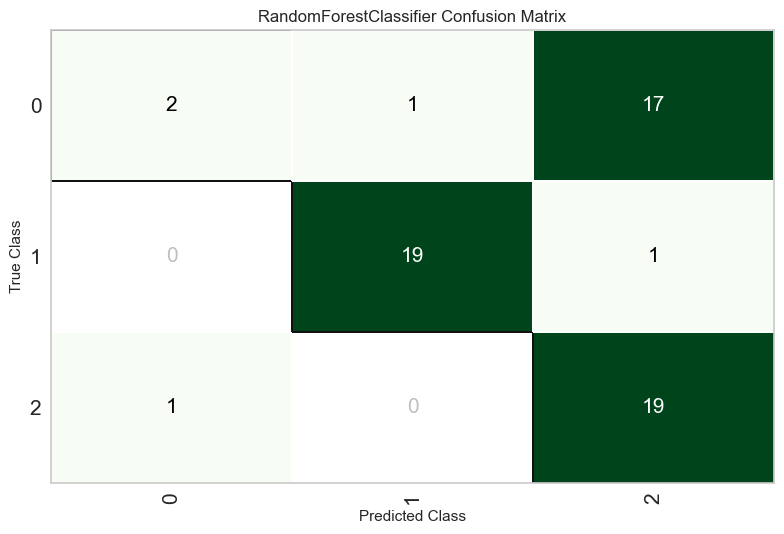

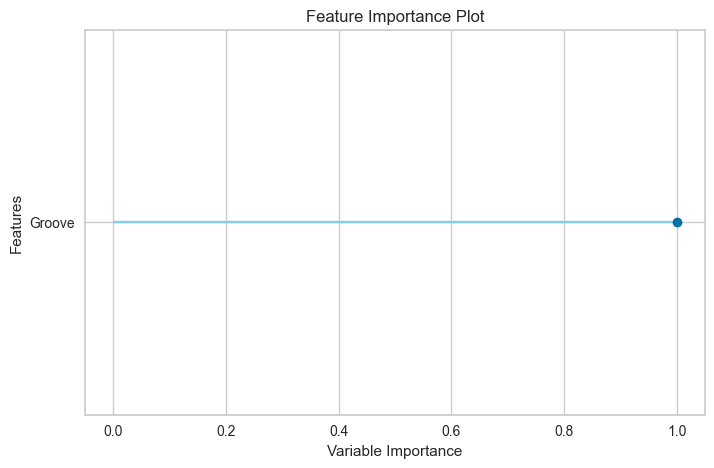

In [23]:
# Evaluate the model
evaluate_model(model)
plot_model(model, plot='confusion_matrix')
plot_model(model, plot='feature')


In [24]:
# Finalize model
final_model = finalize_model(model)

In [26]:
# Predict on the test data (unseen data)
predictions = predict_model(final_model, data=test_data)

# Display predictions (optional)
print(predictions.head())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.3250,0,0.3250,0.1703,0.2233,0.0753,0.0997


         Area  Perimeter  Compactness    Length     Width  AsymmetryCoeff  \
82   1.360027   1.273131     1.121580  0.996320  1.320899       -1.397175   
15  -0.318868  -0.585878     2.041562 -1.184582  0.311279        1.045919   
111  1.387494   1.227230     1.585870  0.921740  1.673338        0.432590   
177 -1.067332  -0.876587    -2.192934 -0.520141 -1.456218        0.816943   
76   0.553196   0.569309     0.493929  0.523980  0.533872        1.248999   

       Groove  Type  prediction_label  prediction_score  
82   1.400564     2                 1            0.5657  
15  -1.301488     1                 3            0.5524  
111  0.670115     2                 3            0.5524  
177 -0.139687     3                 3            0.5524  
76   0.934623     2                 3            0.5524  


In [27]:
# Save pipeline
save_model(final_model, 'wheat_classifier_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Area', 'Perimeter', 'Compactness',
                                              'Length', 'Width',
                                              'AsymmetryCoeff', 'Groove'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_va...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=7, max_features='sqrt',

In [30]:
# Import necessary MLFlow functions
from mlflow import log_param, log_metric, log_artifact

# Ensure that you have pulled the performance metrics
performance = pull()  # Pull the metrics from the last evaluated model

# Log model details and accuracy
log_param("model", "Random Forest")
log_param("accuracy", performance['Accuracy'][0])  # Accuracy is typically in the first row
log_metric("accuracy", performance['Accuracy'][0])  # Log the accuracy metric

# Save model artifact
log_artifact('wheat_classifier_model.pkl')  # Save the model artifact
